# Libraries

In [ ]:
#Importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

# Data Reading

In [ ]:
#Reading training and testing data as dataframes
train_df = pd.read_csv("train.csv",sep =";")
test_df = pd.read_csv("test.csv", sep =";")

# Data Preprocessing

In [ ]:
train_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
#Dimensions of dataset
train_df.shape

(45211, 17)

In [ ]:
#Information about the data types of features
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
#Statistical summary of training dataset
train_df.describe(include ='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


## Checking for Missing Values

In [ ]:
#Checking if there are any missing values
train_df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

# Data Visualization

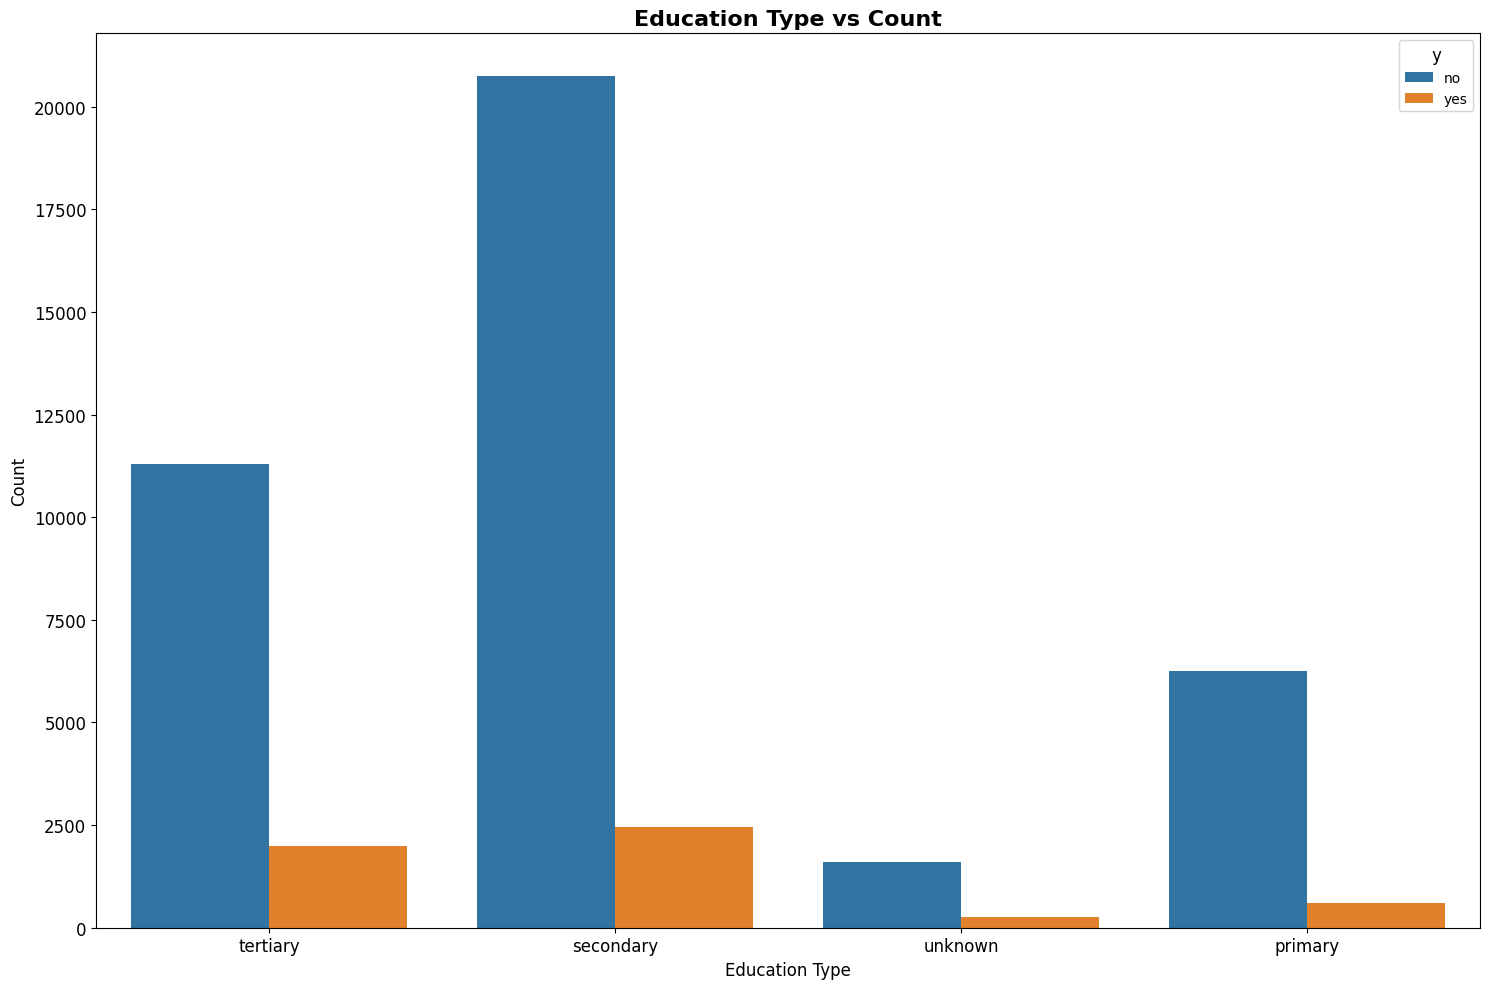

In [ ]:
plt.figure(figsize=(15, 10))
sns.countplot(x="education", data=train_df, hue="y")
plt.title("Education Type vs Count", fontsize=16, fontweight="bold")
plt.xlabel("Education Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="y", title_fontsize=12)
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

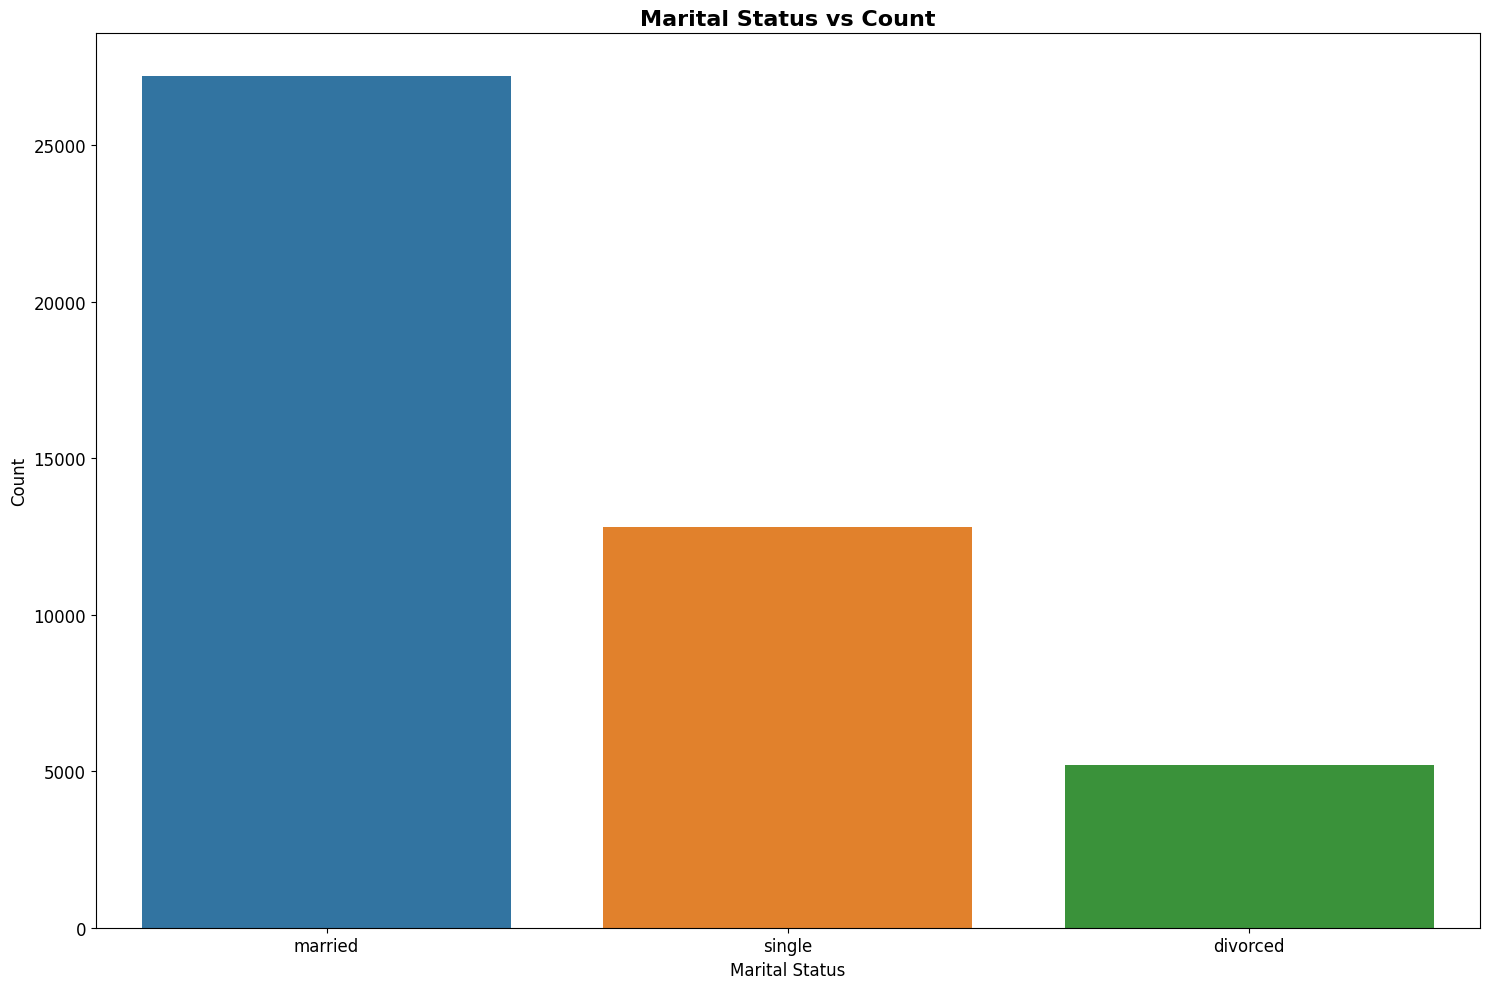

In [ ]:
plt.figure(figsize=(15, 10))
sns.countplot(x="marital", data=train_df)
plt.title("Marital Status vs Count", fontsize=16, fontweight="bold")
plt.xlabel("Marital Status", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(fontsize=12, rotation=0)  # No need to rotate in this case
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

* It seems like more number of married people invested in Term deposits

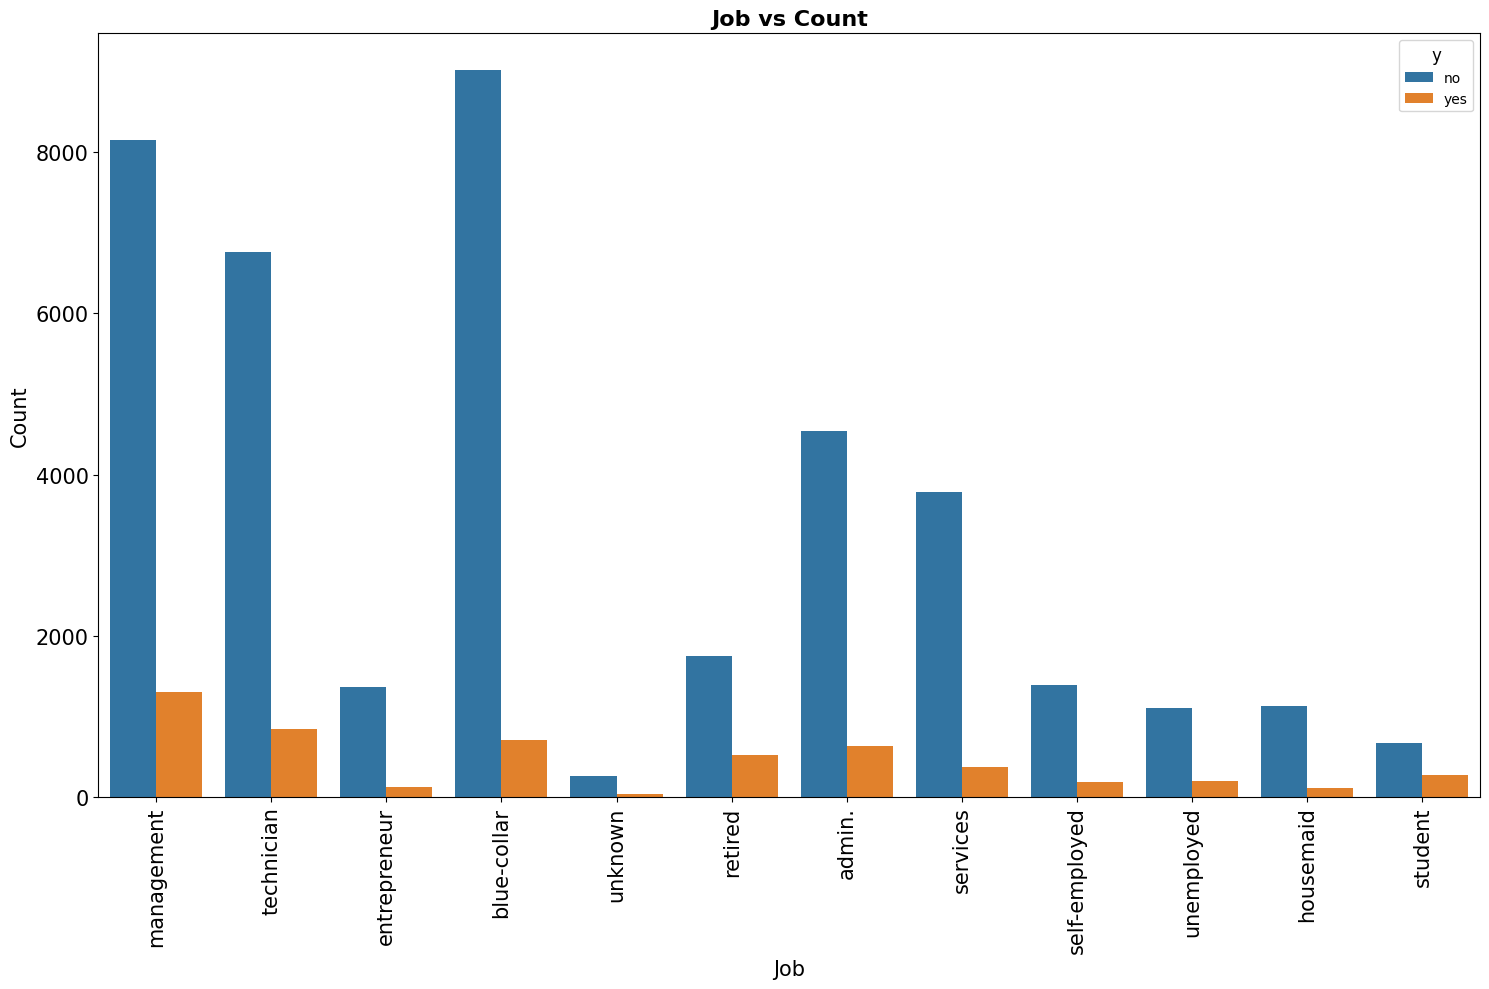

In [ ]:
plt.figure(figsize=(15, 10))
sns.countplot(x="job", data=train_df, hue="y")
plt.title("Job vs Count", fontsize=16, fontweight="bold")  # Adjust fontsize and fontweight
plt.xticks(rotation=90)
plt.xlabel("Job", fontsize=15)  # Adjust font size for x-label
plt.ylabel("Count", fontsize=15)  # Adjust font size for y-label
plt.legend(title="y", title_fontsize=12)  # Adjust legend title font size
plt.xticks(fontsize=15)  # Adjust font size for x-axis tick labels
plt.yticks(fontsize=15)  # Adjust font size for y-axis tick labels
plt.tight_layout()  # Ensures proper spacing
plt.show()

* It seems like more number of people working in management profiles have subscribed to term deposits

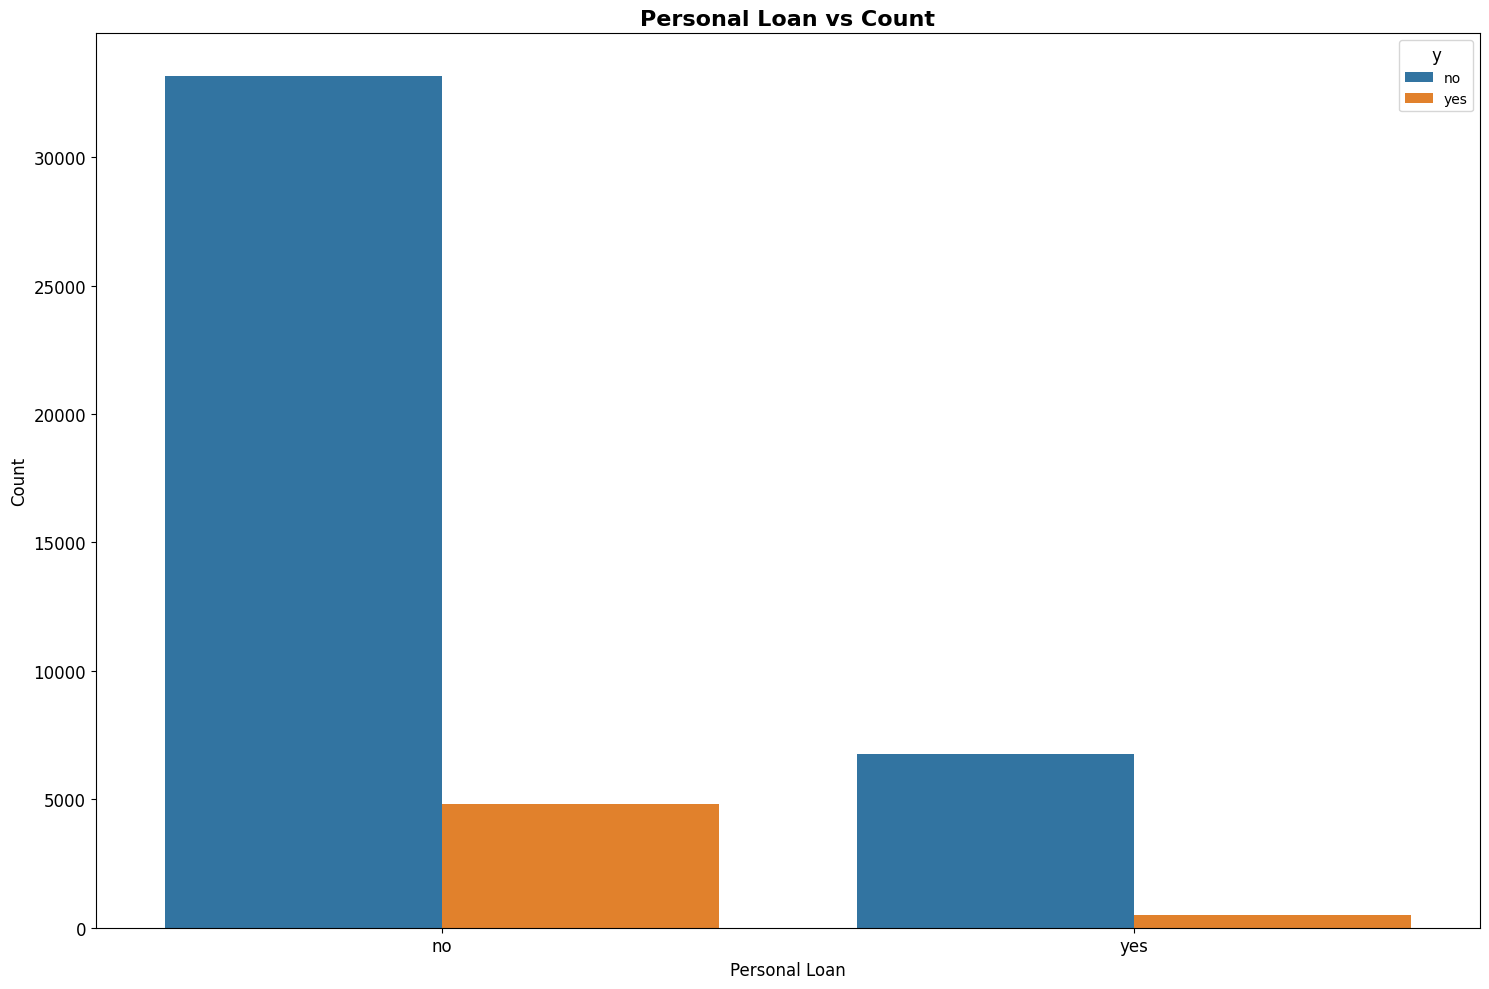

In [ ]:
plt.figure(figsize=(15, 10))
sns.countplot(x="loan", data=train_df, hue="y")
plt.title("Personal Loan vs Count", fontsize=16, fontweight="bold")
plt.xlabel("Personal Loan", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="y", title_fontsize=12)
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

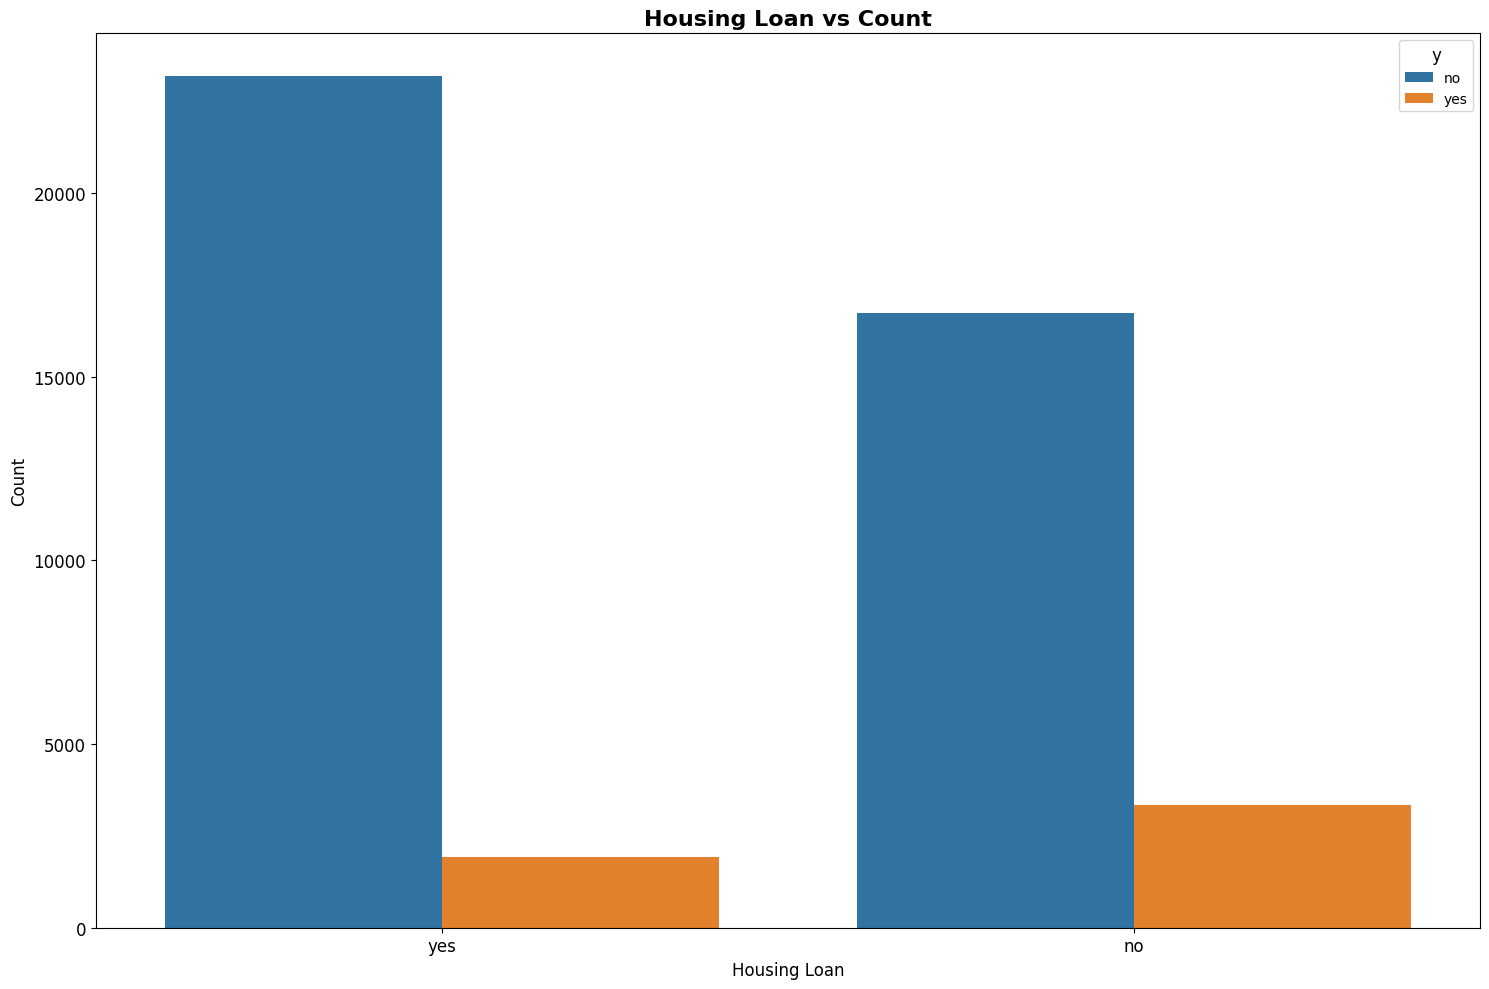

In [ ]:
plt.figure(figsize=(15, 10))
sns.countplot(x="housing", data=train_df, hue="y")
plt.title("Housing Loan vs Count", fontsize=16, fontweight="bold")
plt.xlabel("Housing Loan", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="y", title_fontsize=12)
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

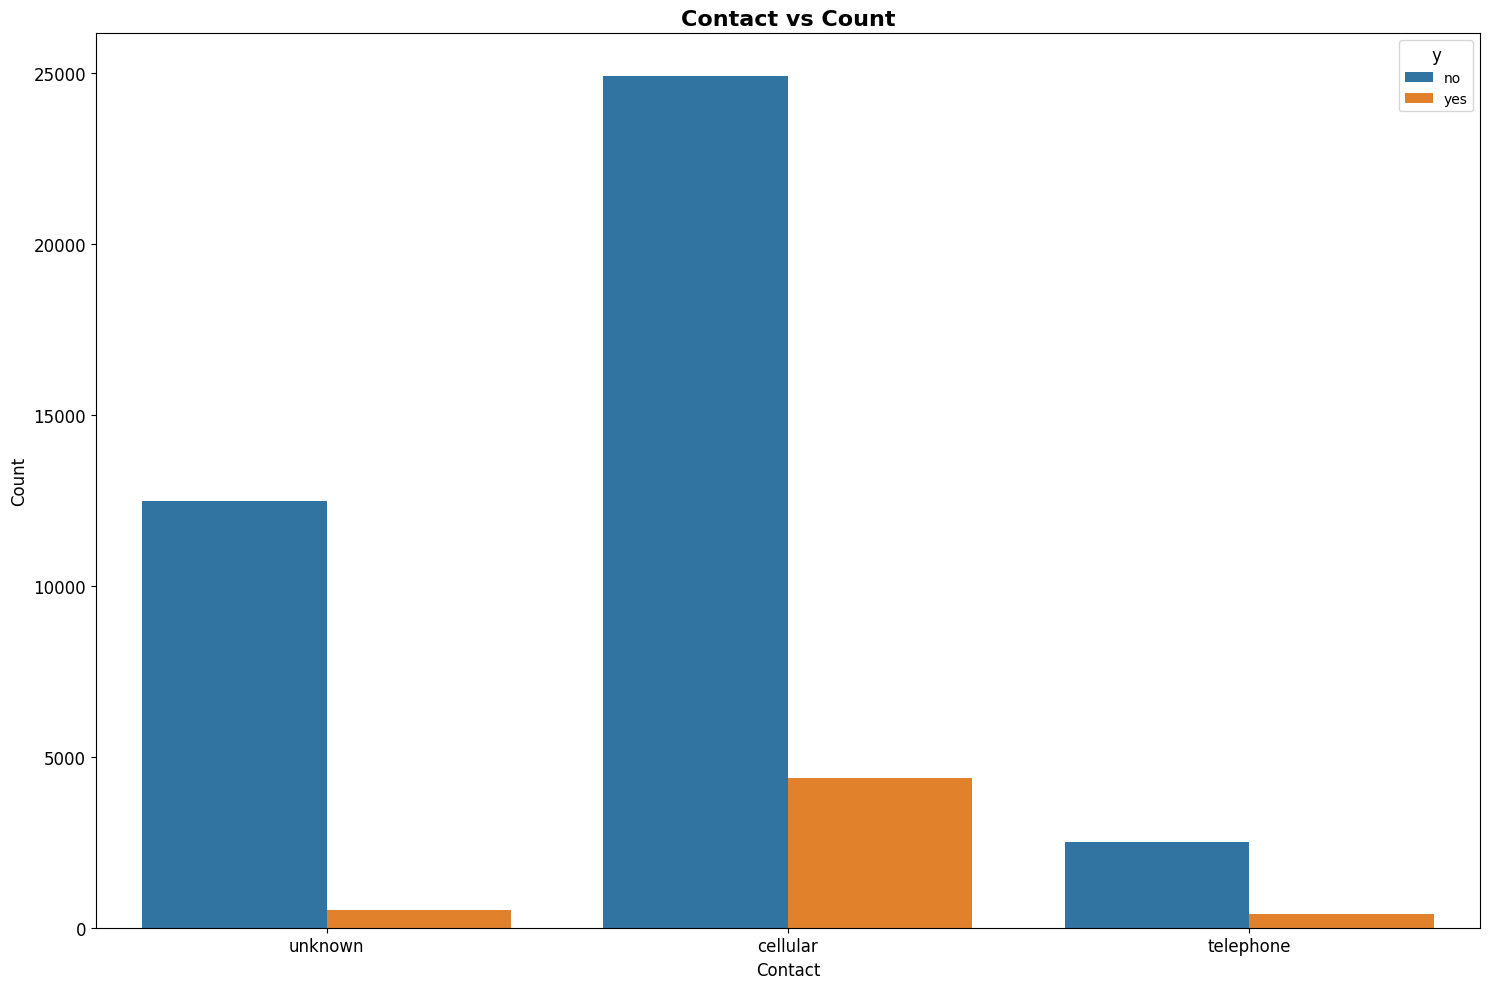

In [ ]:
plt.figure(figsize=(15, 10))
sns.countplot(x="contact", data=train_df, hue="y")
plt.title("Contact vs Count", fontsize=16, fontweight="bold")
plt.xlabel("Contact", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="y", title_fontsize=12)
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

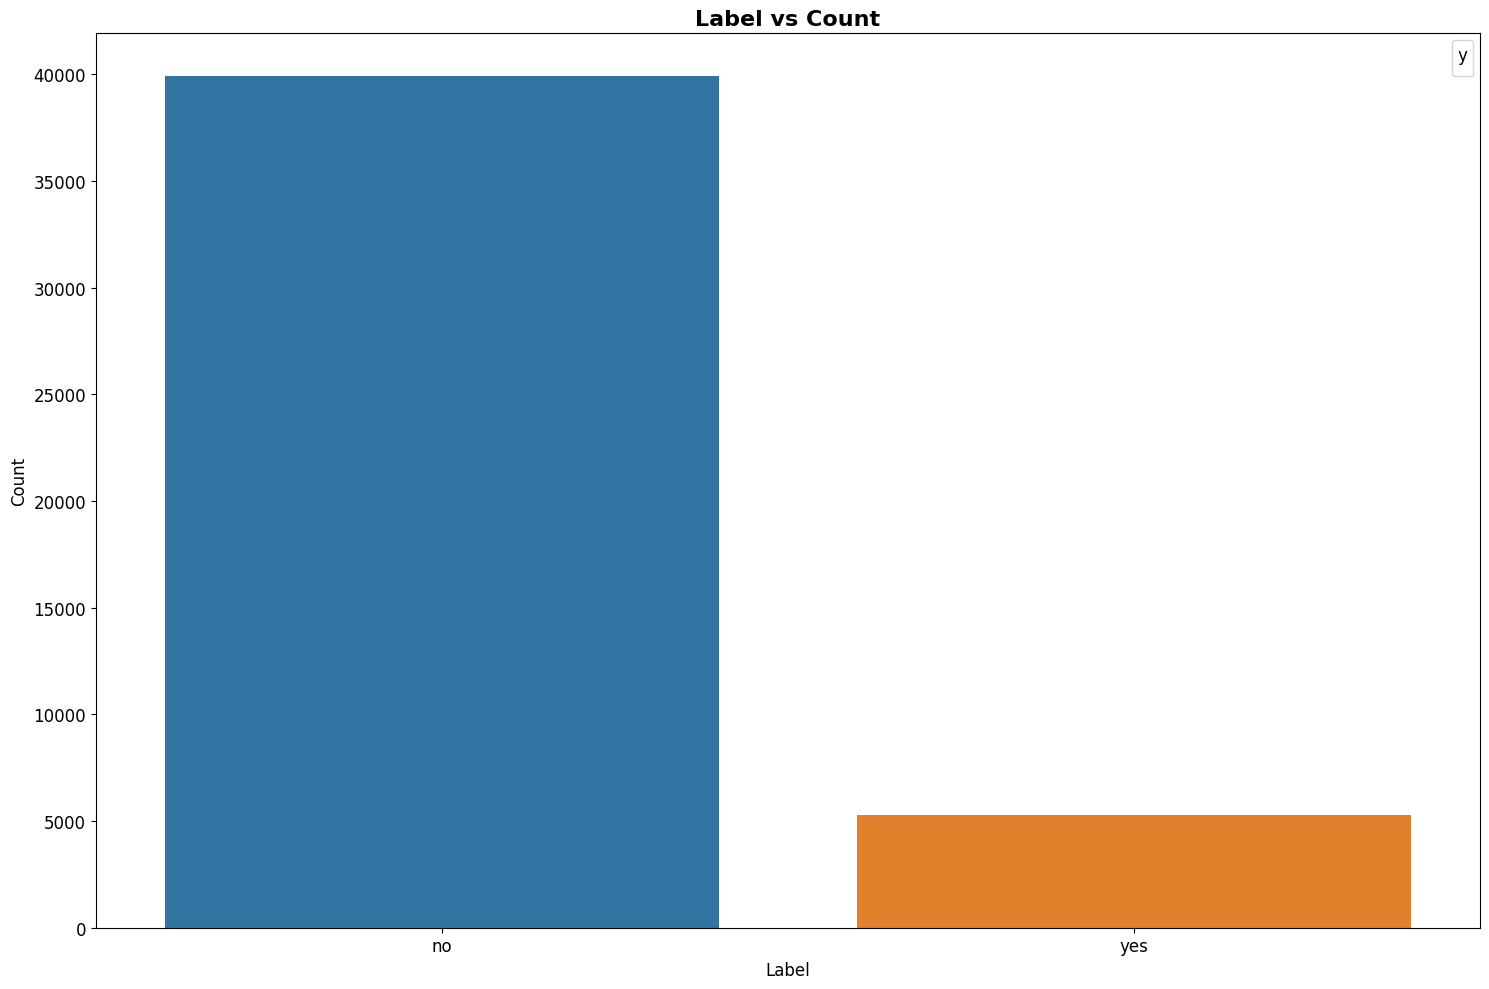

In [ ]:
plt.figure(figsize=(15, 10))
sns.countplot(x="y", data=train_df)
plt.title("Label vs Count", fontsize=16, fontweight="bold")
plt.xlabel("Label", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="y", title_fontsize=12)
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

## Correlation

* There is no multicollinearity between independent variables

# Feature Encoding

In [ ]:
#Combining training and testing data for the purpose of encoding
df = pd.concat([train_df,test_df], ignore_index=True)
df.shape

(49732, 17)

In [ ]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49727,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
49728,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
49729,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
49730,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


<ipython-input-17-e645a6e183a9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


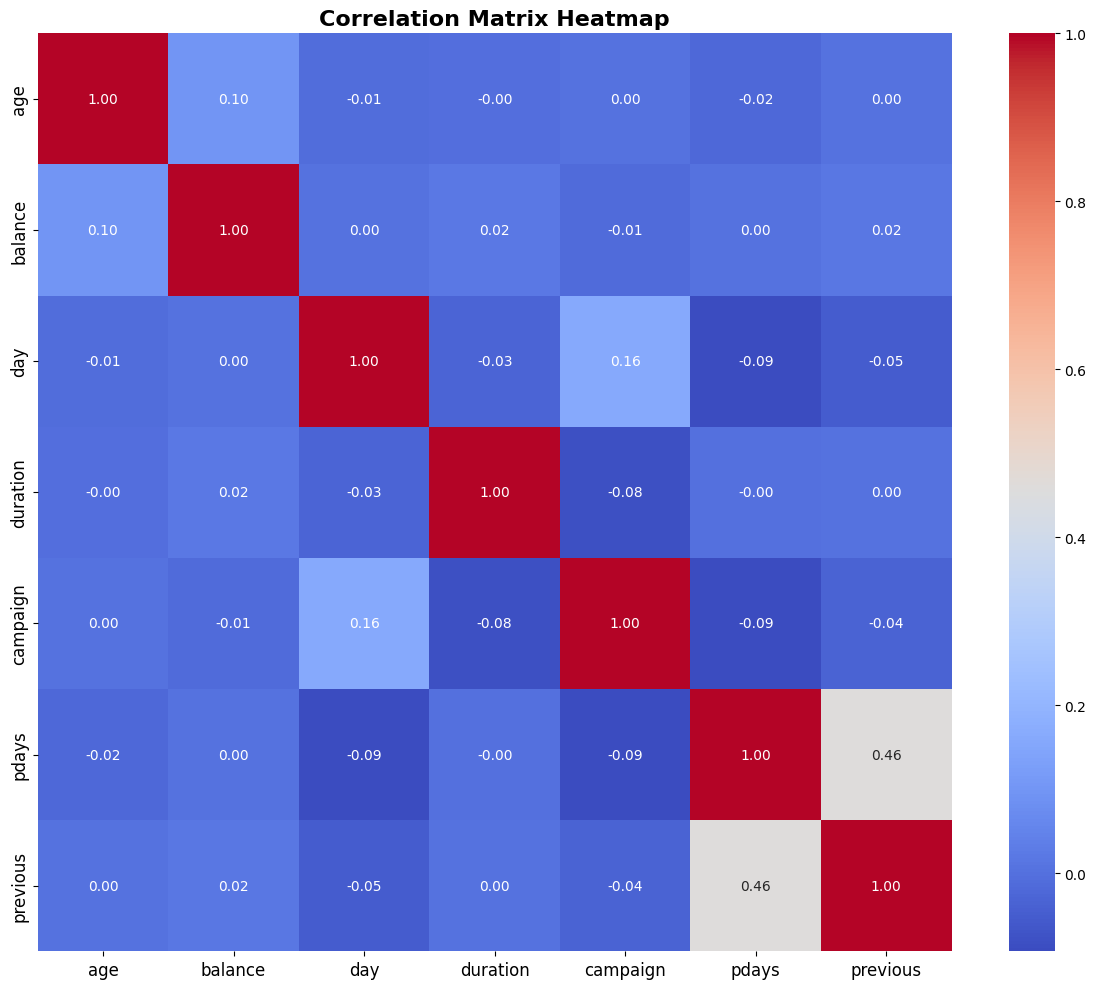

In [ ]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix Heatmap", fontsize=16, fontweight="bold")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

<ipython-input-18-ffa24215406a>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.zeros_like(df[features].corr(), dtype=np.bool)
<ipython-input-18-ffa24215406a>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df[features].corr(), dtype=np.bool)
<ipython-input-18-ffa24215406a>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only

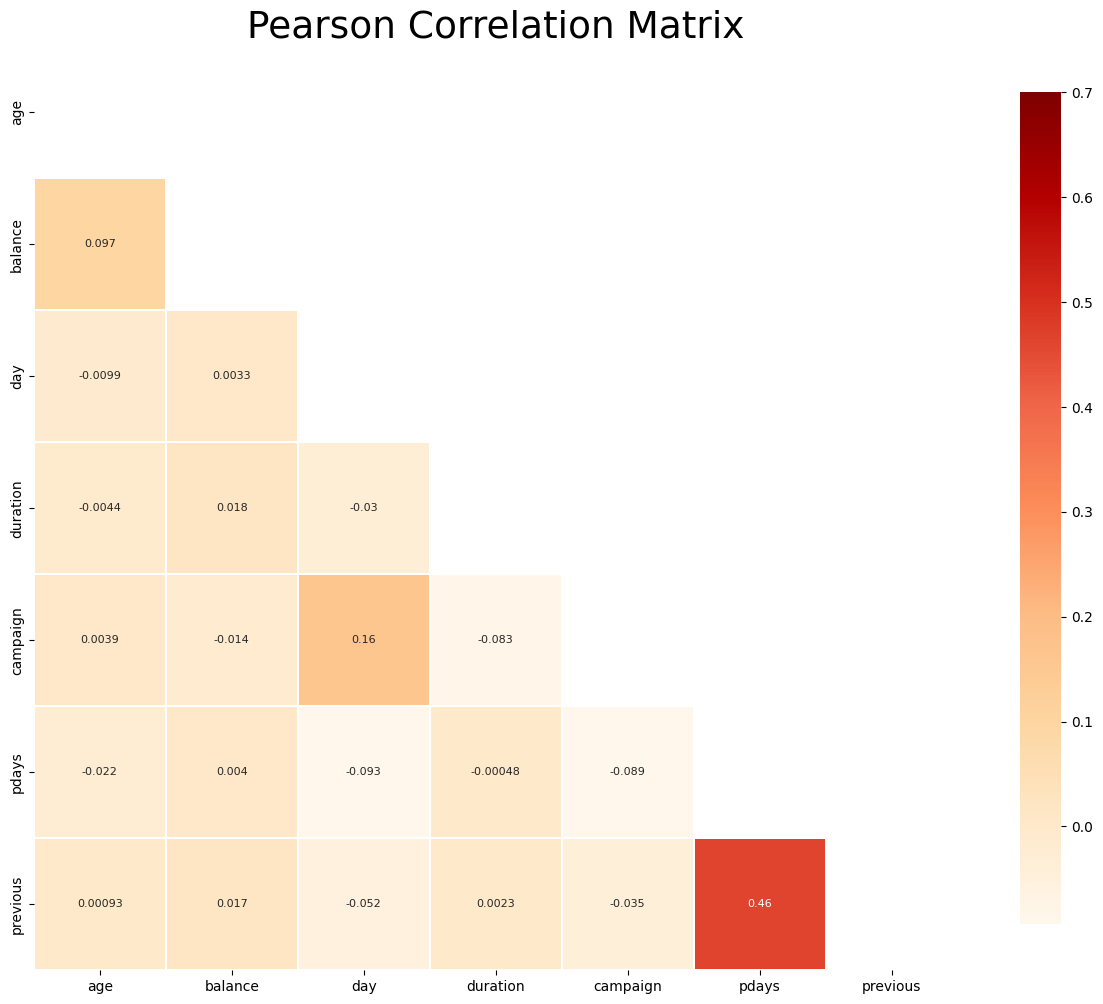

In [ ]:
features = df.columns ## Fetching all Features Column names
## Applying Pearson Correaltion
mask = np.zeros_like(df[features].corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
## Creating a Plot Diagram
f, ax = plt.subplots(figsize=(16, 12))
## Title of Plot
plt.title('Pearson Correlation Matrix',fontsize=27)
sns.heatmap(df[features].corr(),linewidths=0.25,vmax=0.7,square=True,cmap="OrRd",
linecolor='w',annot=True,annot_kws={"size":8},mask=mask,cbar_kws={"shrink": .9});

In [ ]:
relevant_features = mask[mask>0.9] ## selecting features with 80% correlation
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

<ipython-input-19-291e4adbf517>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr().abs()
<ipython-input-19-291e4adbf517>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [ ]:
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
df = df.drop(df[to_drop], axis=1)
to_drop

[]

In [ ]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Loop through each column and apply label encoding
for column in df.columns:
    df[column] = label_encoder.fit_transform(df[column])

# print(df)

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,40,4,1,2,0,3036,1,0,2,4,8,261,0,0,0,3,0
1,26,9,2,1,0,945,1,0,2,4,8,151,0,0,0,3,0
2,15,2,1,1,0,918,1,1,2,4,8,76,0,0,0,3,0
3,29,1,1,3,0,2420,1,0,2,4,8,92,0,0,0,3,0
4,15,11,2,3,0,917,0,0,2,4,8,198,0,0,0,3,0


In [ ]:
# columns = df.columns
# scaler = MinMaxScaler()
# df = scaler.fit_transform(df)
# df = pd.DataFrame(df,columns=[columns])
# df.head()

## XGB Feature importance

In [ ]:
#splitting
x=df.drop(['y'], axis = 1)
y=df.y

In [ ]:
#Fit the model again, make predictions, calculate accuracy
import xgboost as xgb
from sklearn.preprocessing import StandardScaler

model1 = xgb.XGBClassifier(learning_rate=0.1, n_estimators=1000)
model1.fit(x, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
feature_scores = pd.Series(model1.feature_importances_, index=x.columns).sort_values(ascending=False)
feature_scores

poutcome     0.240449
contact      0.147449
housing      0.105356
duration     0.084328
month        0.074434
loan         0.057745
pdays        0.050271
day          0.031546
previous     0.028900
age          0.028462
marital      0.028079
education    0.027608
campaign     0.027235
balance      0.023640
default      0.022504
job          0.021995
dtype: float32

In [ ]:
def plot_feature_importance(importance,names,model_type):
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

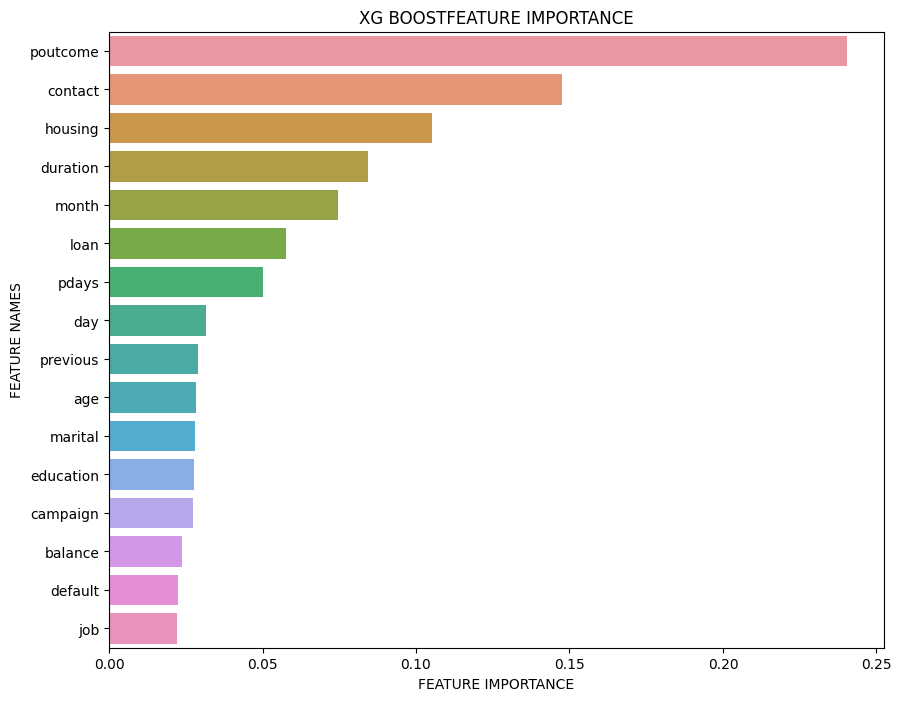

In [ ]:
plot_feature_importance(model1.feature_importances_,x.columns,'XG BOOST')
plt.savefig('XGB-model_features.png')

In [ ]:
features = feature_scores.index[0:12]
x = x[features]

In [ ]:
# Get column names first
names = x.columns
# Create the Scaler object
sc = MinMaxScaler()
# Fit your data on the scaler object
x = sc.fit_transform(x)
x = pd.DataFrame(x, columns=names)

In [ ]:
# columns = df.columns.values
# print(columns)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49732 entries, 0 to 49731
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        49732 non-null  int64
 1   job        49732 non-null  int64
 2   marital    49732 non-null  int64
 3   education  49732 non-null  int64
 4   default    49732 non-null  int64
 5   balance    49732 non-null  int64
 6   housing    49732 non-null  int64
 7   loan       49732 non-null  int64
 8   contact    49732 non-null  int64
 9   day        49732 non-null  int64
 10  month      49732 non-null  int64
 11  duration   49732 non-null  int64
 12  campaign   49732 non-null  int64
 13  pdays      49732 non-null  int64
 14  previous   49732 non-null  int64
 15  poutcome   49732 non-null  int64
 16  y          49732 non-null  int64
dtypes: int64(17)
memory usage: 6.5 MB


In [ ]:
# df = pd.get_dummies(df,columns = ['job','marital','education','default','housing','month','loan','contact','poutcome'], drop_first = True)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,40,4,1,2,0,3036,1,0,2,4,8,261,0,0,0,3,0
1,26,9,2,1,0,945,1,0,2,4,8,151,0,0,0,3,0
2,15,2,1,1,0,918,1,1,2,4,8,76,0,0,0,3,0
3,29,1,1,3,0,2420,1,0,2,4,8,92,0,0,0,3,0
4,15,11,2,3,0,917,0,0,2,4,8,198,0,0,0,3,0


In [ ]:
# df['y'].replace('yes', 1, inplace=True)
# df['y'].replace('no', 0, inplace=True)
# df.head()

## Features Scaling using MinMax Scaler

In [ ]:
# target = df['y']
# df = df.drop('y',axis = 1)
# columns = df.columns
# scaler = MinMaxScaler()
# df = scaler.fit_transform(df)
# df = pd.DataFrame(df,columns=[columns])
# df.head()

## Split data into train and test (75%:25% ratio)

In [ ]:
# y = np.array(target)
# X = df

#Splitting the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.25, random_state = 20)

Predicting whether the client will subscribe to Term deposit or not

## Model Selection

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, f1_score, precision_score

In [ ]:
models = []
models.append(LogisticRegression(solver='liblinear'))
models.append(SVC(probability=True))
models.append(RandomForestClassifier())

In [ ]:
from sklearn.ensemble import StackingClassifier
# Define the base models
base_models = [
    ('lr', LogisticRegression(solver='liblinear')),
    ('rf', RandomForestClassifier()),
    ('svm', SVC())
]
# Define the stacking classifier with a Logistic Regression meta-classifier
stacking_classifier = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression())
# Add the stacking classifier to the models list
models.append(stacking_classifier)

In [ ]:
stacking_classifier

StackingClassifier(estimators=[('lr', LogisticRegression(solver='liblinear')),
                               ('rf', RandomForestClassifier()),
                               ('svm', SVC())],
                   final_estimator=LogisticRegression())

## Model Training

In [ ]:
model_list = ['Logistic Regression', 'SVM', 'Random Forest', 'Stacking Classifier']
acc_list = []
auc_list = []
cm_list = []
recall_list=[]
f1_list=[]
precision_list=[]


for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc_list.append(metrics.accuracy_score(y_test, y_pred))

    fpr, tpr, _thresholds = metrics.roc_curve(y_test, y_pred)
    auc_list.append(round(metrics.auc(fpr, tpr), 2))

    cm_list.append(confusion_matrix(y_test, y_pred))

    recall_list.append(round(recall_score(y_test, y_pred), 2))
    f1_list.append(round(f1_score(y_test, y_pred), 2))
    precision_list.append(round(precision_score(y_test, y_pred), 2))

     # Print classification report
    print(f"Classification Report for {model}:")
    print(classification_report(y_test, y_pred))
    print("="*50)

Classification Report for LogisticRegression(solver='liblinear'):
              precision    recall  f1-score   support

           0       0.90      0.98      0.94     10938
           1       0.61      0.24      0.35      1495

    accuracy                           0.89     12433
   macro avg       0.76      0.61      0.64     12433
weighted avg       0.87      0.89      0.87     12433

Classification Report for SVC(probability=True):
              precision    recall  f1-score   support

           0       0.90      0.98      0.94     10938
           1       0.67      0.23      0.34      1495

    accuracy                           0.89     12433
   macro avg       0.79      0.61      0.64     12433
weighted avg       0.88      0.89      0.87     12433

Classification Report for RandomForestClassifier():
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     10938
           1       0.71      0.52      0.60      1495

    accuracy   

## Results Comparison

In [ ]:
result_df = pd.DataFrame({'Model':model_list, 'Accuracy': acc_list, 'AUC': auc_list, 'Recall':recall_list,'F1-Score':f1_list,'Precision':precision_list})
result_df

,Model,Accuracy,AUC,Recall,F1-Score,Precision
0,Logistic Regression,0.890453,0.61,0.24,0.35,0.61
1,SVM,0.893751,0.61,0.23,0.34,0.67
2,Random Forest,0.916995,0.75,0.52,0.60,0.71
3,Stacking Classifier,0.917799,0.75,0.53,0.61,0.71


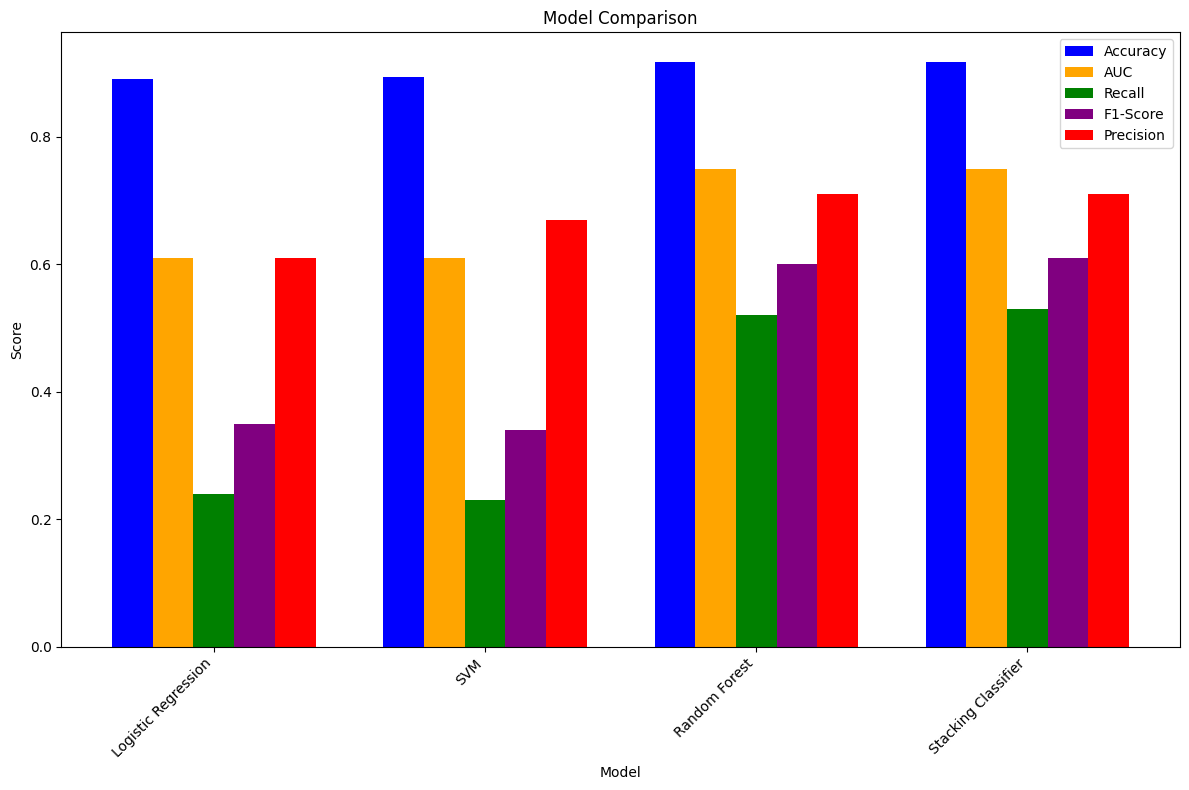

In [ ]:
# Plot comparison
plt.figure(figsize=(12, 8))
bar_width = 0.15  # Width of each bar
index = np.arange(len(result_df['Model']))

plt.bar(index, result_df['Accuracy'], width=bar_width, color='blue', label='Accuracy')
plt.bar(index + bar_width, result_df['AUC'], width=bar_width, color='orange', label='AUC')
plt.bar(index + 2*bar_width, result_df['Recall'], width=bar_width, color='green', label='Recall')
plt.bar(index + 3*bar_width, result_df['F1-Score'], width=bar_width, color='purple', label='F1-Score')
plt.bar(index + 4*bar_width, result_df['Precision'], width=bar_width, color='red', label='Precision')

plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Comparison')
plt.xticks(index + 2*bar_width, result_df['Model'], rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

## Confusion Matrix

[[10705   233]
 [ 1129   366]]
[[10765   173]
 [ 1148   347]]
[[10624   314]
 [  718   777]]
[[10615   323]
 [  699   796]]


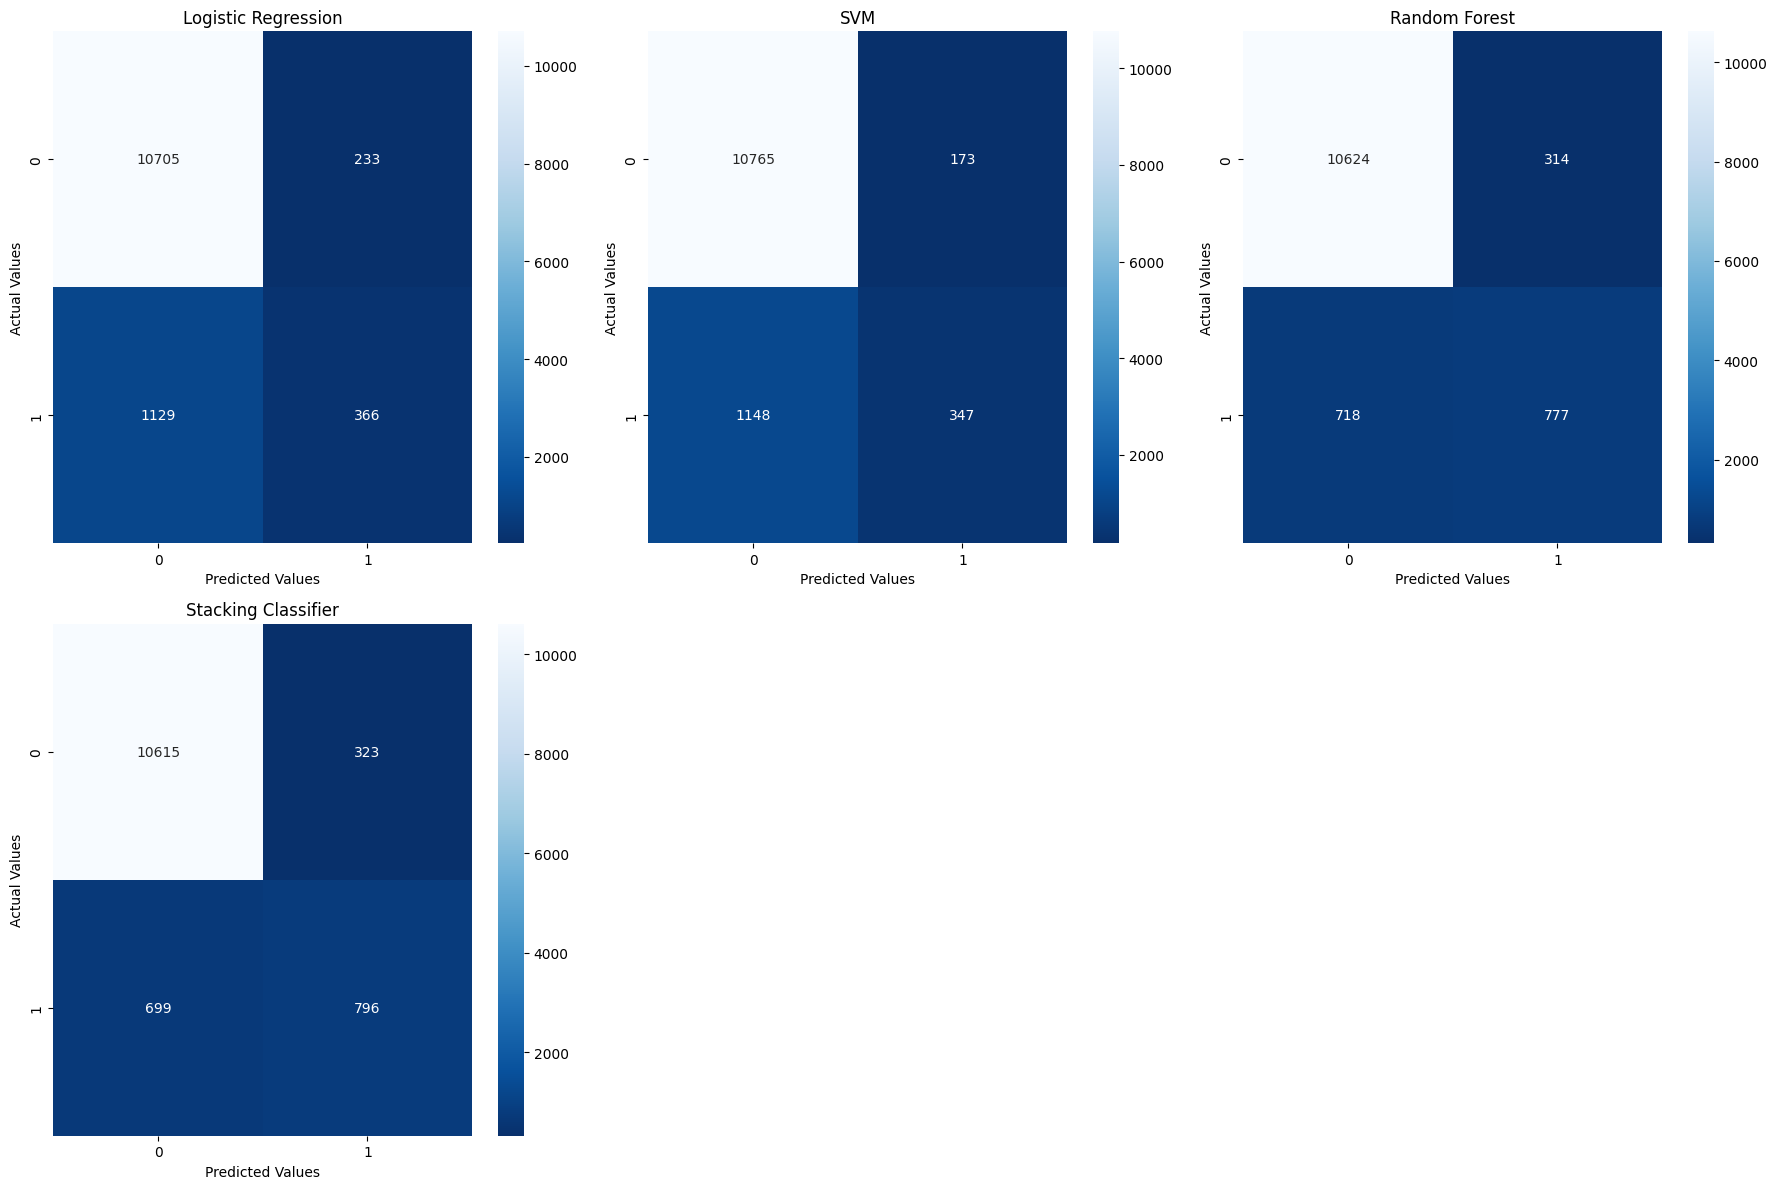

In [ ]:
fig = plt.figure(figsize=(18, 12))
for i in range(len(cm_list)):
    cm = cm_list[i]
    model = model_list[i]
    sub = fig.add_subplot(2, 3, i+1)
    sub.set_title(model)

    # Change formatting of numbers to avoid e+2 format
    cm_plot = sns.heatmap(cm, annot=True, cmap='Blues_r', fmt='d')  # Use 'd' for integer formatting
    cm_plot.set_xlabel('Predicted Values')
    cm_plot.set_ylabel('Actual Values')
    print(cm)

plt.tight_layout()
plt.show()

## Roc Curve Plot

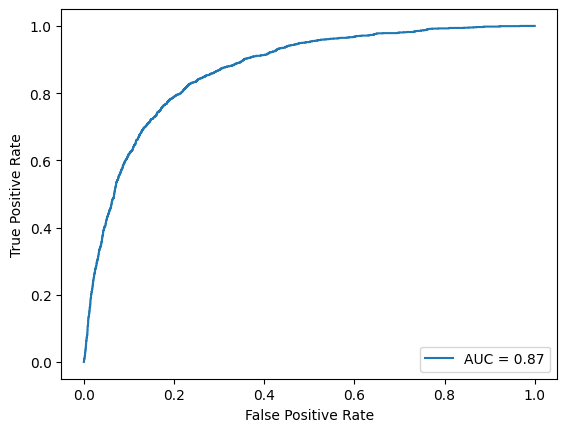

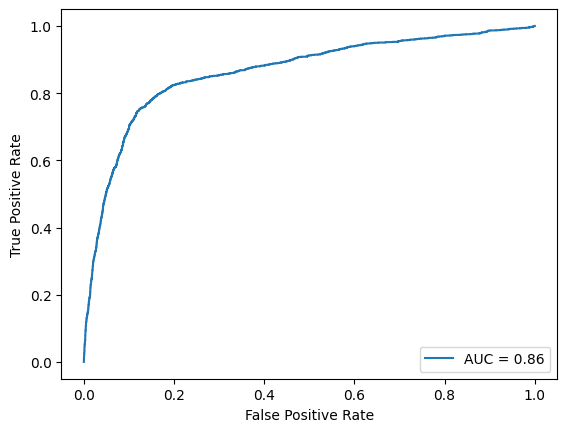

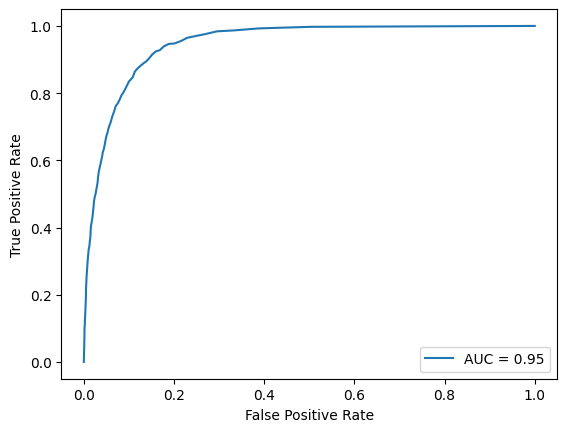

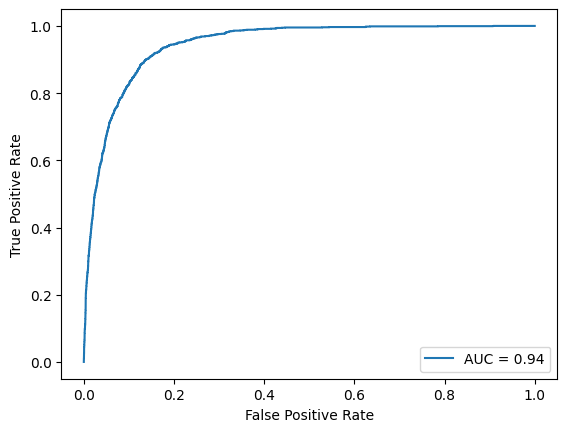

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt

for model in models:
    y_pred = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)  # Calculate AUC-ROC score
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)  # Pass roc_auc
    roc_display.plot()

plt.show()
